# Análisis Comparativo Completo de Algoritmos de Búsqueda e IA en Pokémon Red

Este notebook presenta un análisis exhaustivo y profesional de todos los algoritmos implementados para resolver la tarea de selección del Pokémon inicial en Pokémon Red. Se incluyen métodos de aprendizaje por refuerzo (PPO), algoritmos probabilísticos (Epsilon-Greedy), métodos de búsqueda informada (A*), búsqueda no informada (BFS), y metaheurísticas (Tabu Search, Hill Climbing, Simulated Annealing).

## Objetivos del Análisis

1. **Evaluación Comparativa**: Análisis cuantitativo del rendimiento de cada algoritmo
2. **Análisis Estadístico**: Pruebas de significancia y distribuciones de métricas
3. **Visualizaciones Avanzadas**: Gráficos profesionales con diseño moderno
4. **Recomendaciones**: Identificación del algoritmo óptimo para diferentes escenarios

## 1. Configuración del Entorno y Dependencias

Esta sección configura el entorno de análisis con todas las librerías necesarias y establece estilos visuales profesionales para las visualizaciones.

In [1]:
# Configuración de librerías y entorno de análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import json
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway, kruskal
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuración de warnings
warnings.filterwarnings('ignore')

# Configuración de estilo profesional y vanguardista
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("plasma")

# Configuración avanzada de matplotlib
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans'],
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 11,
    'figure.titlesize': 18,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.edgecolor': 'gray',
    'axes.linewidth': 0.8
})

# Paletas de colores modernas
MODERN_COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'success': '#C73E1D',
    'warning': '#FFE66D',
    'info': '#06D6A0',
    'light': '#F8F9FA',
    'dark': '#343A40'
}

# Configuración de rutas
BASE_PATH = Path('.')
RESULTS_PATH = BASE_PATH / 'RESULTADOS'
ENHANCED_PATH = BASE_PATH / 'enhanced_comparison_results'
ADVANCED_PATH = BASE_PATH / 'advanced_comparison_results'
OUTPUT_PATH = BASE_PATH / 'notebook_analysis_outputs'
OUTPUT_PATH.mkdir(exist_ok=True)

print("Configuración del entorno completada exitosamente")
print(f"Rutas de datos configuradas:")
print(f"  - RESULTADOS: {RESULTS_PATH}")
print(f"  - Enhanced Results: {ENHANCED_PATH}")  
print(f"  - Advanced Results: {ADVANCED_PATH}")
print(f"  - Output: {OUTPUT_PATH}")

Configuración del entorno completada exitosamente
Rutas de datos configuradas:
  - RESULTADOS: RESULTADOS
  - Enhanced Results: enhanced_comparison_results
  - Advanced Results: advanced_comparison_results
  - Output: notebook_analysis_outputs


## 2. Carga y Procesamiento de Datos

Esta sección carga y procesa todos los datos de resultados de los diferentes algoritmos, unificando formatos y creando estructuras de datos consistentes para el análisis.

In [2]:
def load_comprehensive_data():
    """Carga todos los datos de resultados disponibles"""
    all_data = []
    
    # Cargar datos de enhanced_execution
    enhanced_dir = RESULTS_PATH / 'enhanced_execution'
    if enhanced_dir.exists():
        print("Cargando datos de enhanced_execution...")
        for algo_dir in enhanced_dir.iterdir():
            if algo_dir.is_dir():
                for csv_file in algo_dir.glob('*.csv'):
                    try:
                        df = pd.read_csv(csv_file)
                        df['algorithm'] = algo_dir.name
                        df['source'] = 'enhanced_execution'
                        all_data.append(df)
                    except Exception as e:
                        print(f"Error cargando {csv_file}: {e}")
    
    # Cargar datos del directorio enhanced_comparison_results
    if ENHANCED_PATH.exists():
        print("Cargando datos de enhanced_comparison_results...")
        csv_file = ENHANCED_PATH / 'processed_comparison_data.csv'
        if csv_file.exists():
            try:
                df = pd.read_csv(csv_file)
                df['source'] = 'enhanced_comparison'
                all_data.append(df)
            except Exception as e:
                print(f"Error cargando {csv_file}: {e}")
    
    # Combinar todos los datos
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True, sort=False)
        print(f"Datos cargados exitosamente: {len(combined_df)} registros")
        return combined_df
    else:
        print("No se encontraron datos para cargar")
        return pd.DataFrame()

def clean_and_standardize_data(df):
    """Limpia y estandariza los datos para análisis"""
    if df.empty:
        return df
    
    # Estandarizar nombres de algoritmos
    algorithm_mapping = {
        'ppo_default': 'PPO',
        'epsilon_greedy_alta_exploracion': 'Epsilon-Greedy (Alta)',
        'epsilon_greedy_balanceada': 'Epsilon-Greedy (Balanceada)',
        'epsilon_greedy_conservadora': 'Epsilon-Greedy (Conservadora)',
        'astar_default': 'A* Search',
        'bfs_default': 'Breadth-First Search',
        'tabu_search_default': 'Tabu Search',
        'hill_climbing_steepest_ascent': 'Hill Climbing (Steepest)',
        'hill_climbing_first_improvement': 'Hill Climbing (First)',
        'hill_climbing_random_restart': 'Hill Climbing (Random)',
        'simulated_annealing_default': 'Simulated Annealing'
    }
    
    if 'algorithm' in df.columns:
        df['algorithm_clean'] = df['algorithm'].map(algorithm_mapping).fillna(df['algorithm'])
    
    # Limpiar columnas numéricas
    numeric_columns = ['total_steps', 'execution_time', 'total_reward', 'explored_positions', 'success_rate']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Remover filas con datos faltantes críticos
    if 'total_steps' in df.columns and 'execution_time' in df.columns:
        df = df.dropna(subset=['total_steps', 'execution_time'])
    
    return df

# Cargar y procesar datos
raw_data = load_comprehensive_data()
processed_data = clean_and_standardize_data(raw_data)

if not processed_data.empty:
    print(f"Datos procesados: {len(processed_data)} registros")
    print(f"Algoritmos únicos: {processed_data['algorithm_clean'].unique() if 'algorithm_clean' in processed_data.columns else 'N/A'}")
    print(f"Columnas disponibles: {list(processed_data.columns)}")
else:
    print("No hay datos procesados disponibles")

Cargando datos de enhanced_execution...
Cargando datos de enhanced_comparison_results...
Datos cargados exitosamente: 189 registros
Datos procesados: 189 registros
Algoritmos únicos: ['A* Search' 'Breadth-First Search' 'Epsilon-Greedy (Alta)'
 'Epsilon-Greedy (Balanceada)' 'Epsilon-Greedy (Conservadora)'
 'Hill Climbing (First)' 'Hill Climbing (Random)'
 'Hill Climbing (Steepest)' 'PPO' 'Simulated Annealing' 'Tabu Search' nan]
Columnas disponibles: ['Métrica', 'Valor', 'algorithm', 'source', 'Eficiencia Exploración', 'Epsilon Decay', 'Epsilon Min', 'Epsilon Start', 'Pasos Totales', 'Pasos/Segundo', 'Pokemon Obtenidos', 'Posiciones Exploradas', 'Recompensa Promedio', 'Recompensa Total', 'Suma de Niveles', 'Tiempo (s)', 'Timestamp', 'Algorithm', 'Source_File', 'Eficiencia (Rew/Paso)', 'Estado de Ejecución', 'Velocidad (Pasos/s)', 'Escenario', 'Memoria (MB)', 'Razón', 'Agente', 'Modelo', 'Acción Más Usada', 'Algoritmo', 'Eficiencia (Recompensa/Paso)', 'Posiciones Visitadas', 'Razón de Ter

=== ANÁLISIS EXPLORATORIO DE DATOS ===
Dimensiones del dataset: (189, 38)

Primeras 5 filas:


,Métrica,Valor,algorithm,source,Eficiencia Exploración,Epsilon Decay,Epsilon Min,Epsilon Start,Pasos Totales,Pasos/Segundo,...,Algoritmo,Eficiencia (Recompensa/Paso),Posiciones Visitadas,Razón de Terminación,Total_Steps,Execution_Time,Total_Reward,Efficiency,Speed,algorithm_clean
0,Pasos Totales,0,astar_default,enhanced_execution,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A* Search
1,Tiempo (s),0.0,astar_default,enhanced_execution,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A* Search
2,Recompensa Total,0.0,astar_default,enhanced_execution,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A* Search
3,Eficiencia (Rew/Paso),0.0,astar_default,enhanced_execution,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A* Search
4,Velocidad (Pasos/s),0.0,astar_default,enhanced_execution,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A* Search



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Métrica                       72 non-null     object 
 1   Valor                         72 non-null     object 
 2   algorithm                     72 non-null     object 
 3   source                        189 non-null    object 
 4   Eficiencia Exploración        56 non-null     float64
 5   Epsilon Decay                 56 non-null     float64
 6   Epsilon Min                   56 non-null     float64
 7   Epsilon Start                 56 non-null     float64
 8   Pasos Totales                 117 non-null    float64
 9   Pasos/Segundo                 77 non-null     float64
 10  Pokemon Obtenidos             84 non-null     float64
 11  Posiciones Exploradas         56 non-null     float64
 12  Recompensa Promedio           56 non-n

,Eficiencia Exploración,Epsilon Decay,Epsilon Min,Epsilon Start,Pasos Totales,Pasos/Segundo,Pokemon Obtenidos,Posiciones Exploradas,Recompensa Promedio,Recompensa Total,...,Velocidad (Pasos/s),Memoria (MB),Acción Más Usada,Eficiencia (Recompensa/Paso),Posiciones Visitadas,Total_Steps,Execution_Time,Total_Reward,Efficiency,Speed
count,56.000000,56.000000,56.000000,56.000000,117.000000,77.000000,84.0,56.000000,56.000000,117.000000,...,40.000000,21.000000,28.000000,28.000000,28.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.431491,0.999539,0.044107,0.500000,2010.529915,296.541996,1.0,163.392857,1.350259,85.756458,...,123.250000,291.201451,1.178571,2.498218,17.178571,2010.529915,122.400242,85.756458,1.251860,1970.527638
std,0.139494,0.000314,0.033236,0.282843,6937.771032,429.723811,0.0,194.817647,3.557220,88.652300,...,163.587779,94.428437,1.700840,2.705812,16.291451,6937.771032,470.037896,88.652300,2.917250,3745.645842
min,0.292079,0.999000,0.010000,0.100000,0.000000,4.000000,1.0,5.000000,0.187490,0.000000,...,0.000000,171.636719,0.000000,0.525100,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.358261,0.999500,0.010000,0.300000,15.000000,14.875559,1.0,44.750000,0.360596,15.860000,...,0.000000,198.921875,0.000000,0.666125,4.000000,15.000000,0.000000,15.860000,0.080757,14.874200
50%,0.418102,0.999500,0.050000,0.500000,155.000000,142.000000,1.0,92.000000,0.549114,52.600000,...,40.000000,377.636719,0.500000,1.007250,13.000000,155.000000,0.001532,52.600000,0.518925,290.000000
75%,0.457826,0.999800,0.050000,0.700000,360.000000,330.000000,1.0,176.500000,0.881917,129.386634,...,207.500000,378.253906,1.250000,3.025000,25.750000,360.000000,0.007000,129.386634,0.896429,2060.000000
max,1.250000,0.999900,0.100000,0.900000,47738.000000,1993.000000,1.0,882.000000,25.349996,437.710985,...,570.000000,378.925781,6.000000,12.010000,55.000000,47738.000000,3213.374849,437.710985,25.349996,19930.000000



Distribución de algoritmos:


algorithm_clean
PPO                              12
Breadth-First Search              6
A* Search                         6
Epsilon-Greedy (Alta)             6
Epsilon-Greedy (Balanceada)       6
Hill Climbing (First)             6
Epsilon-Greedy (Conservadora)     6
Hill Climbing (Random)            6
Hill Climbing (Steepest)          6
Simulated Annealing               6
Tabu Search                       6
Name: count, dtype: int64

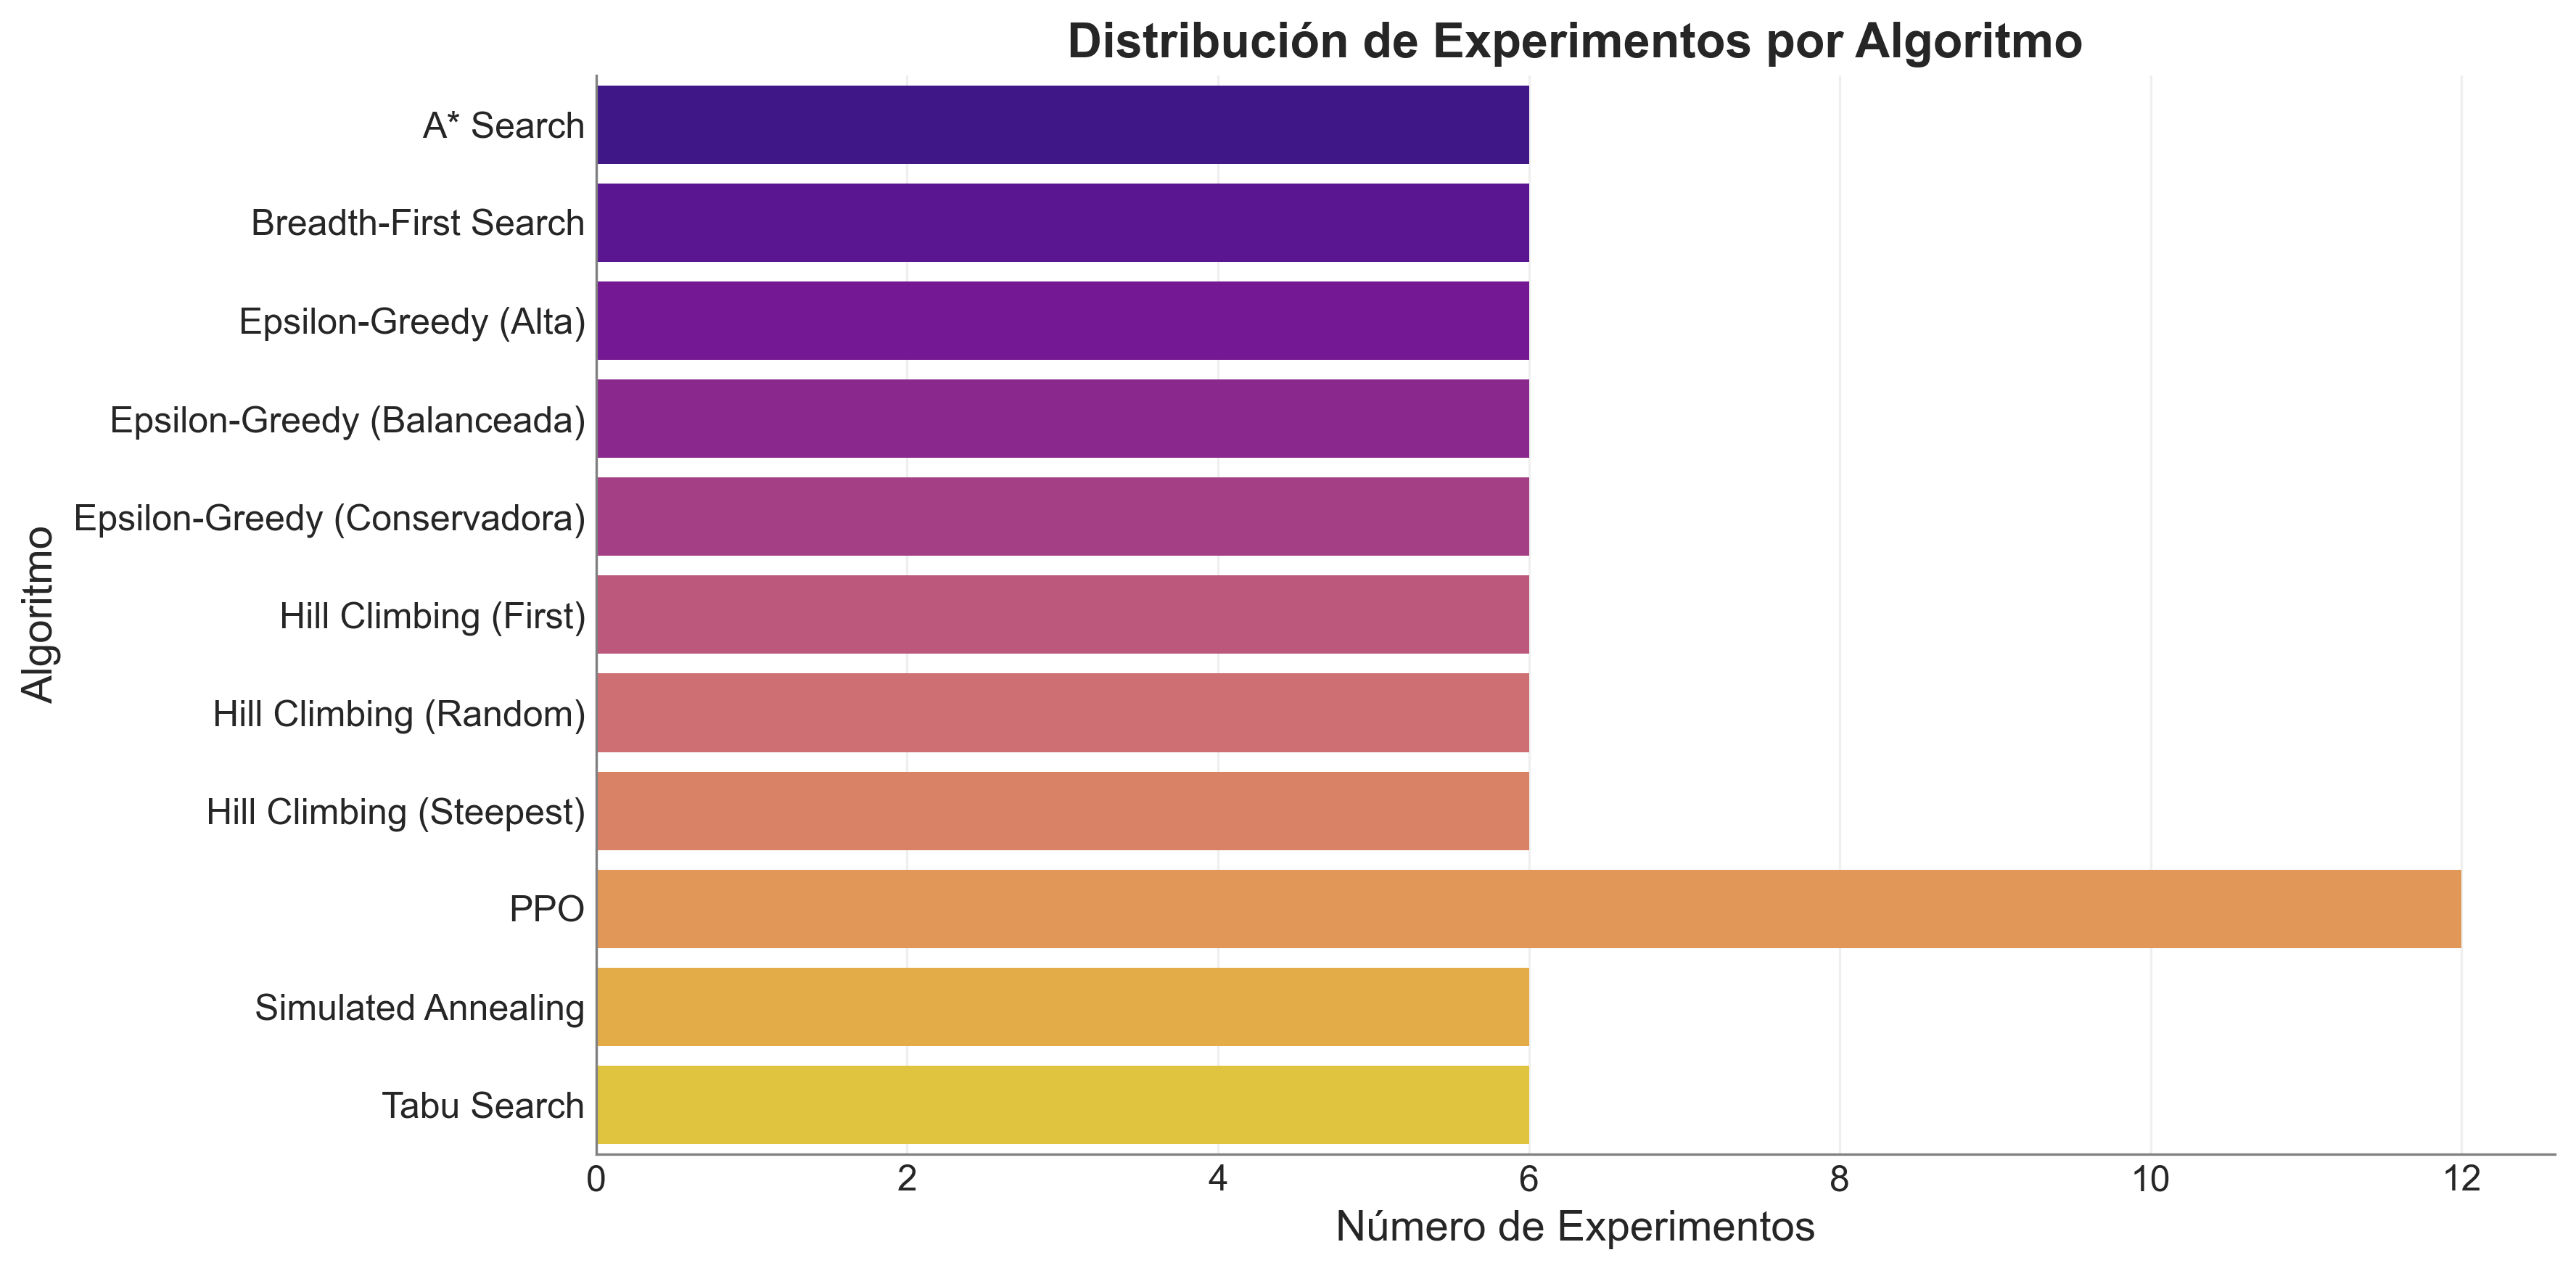

In [3]:
# Análisis exploratorio de los datos cargados
if not processed_data.empty:
    print("=== ANÁLISIS EXPLORATORIO DE DATOS ===")
    print(f"Dimensiones del dataset: {processed_data.shape}")
    print("\nPrimeras 5 filas:")
    display(processed_data.head())
    
    print("\nInformación del dataset:")
    print(processed_data.info())
    
    print("\nEstadísticas descriptivas:")
    display(processed_data.describe())
    
    if 'algorithm_clean' in processed_data.columns:
        print(f"\nDistribución de algoritmos:")
        algo_counts = processed_data['algorithm_clean'].value_counts()
        display(algo_counts)
        
        # Crear gráfico de distribución de algoritmos
        plt.figure(figsize=(12, 6))
        sns.countplot(data=processed_data, y='algorithm_clean', palette='plasma')
        plt.title('Distribución de Experimentos por Algoritmo', fontsize=16, fontweight='bold')
        plt.xlabel('Número de Experimentos')
        plt.ylabel('Algoritmo')
        plt.tight_layout()
        plt.savefig(OUTPUT_PATH / 'distribucion_algoritmos.png', dpi=300, bbox_inches='tight')
        plt.show()
else:
    print("No hay datos disponibles para el análisis exploratorio")

## 3. Análisis Estadístico Descriptivo

Esta sección realiza un análisis estadístico completo de las métricas de rendimiento, incluyendo pruebas de normalidad, análisis de varianza y tests de significancia estadística.

In [4]:
def calculate_comprehensive_statistics(data):
    """Calcula estadísticas comprehensivas para cada algoritmo"""
    if data.empty or 'algorithm_clean' not in data.columns:
        print("No hay datos suficientes para calcular estadísticas")
        return None
    
    # Métricas a analizar
    metrics = ['total_steps', 'execution_time', 'total_reward', 'explored_positions']
    available_metrics = [m for m in metrics if m in data.columns]
    
    if not available_metrics:
        print("No se encontraron métricas numéricas para analizar")
        return None
    
    stats_summary = {}
    
    for metric in available_metrics:
        metric_data = data.groupby('algorithm_clean')[metric].agg([
            'count', 'mean', 'median', 'std', 'min', 'max',
            lambda x: x.quantile(0.25),  # Q1
            lambda x: x.quantile(0.75),  # Q3
            lambda x: x.std() / x.mean() if x.mean() != 0 else 0  # CV
        ]).round(4)
        
        metric_data.columns = ['Count', 'Mean', 'Median', 'Std', 'Min', 'Max', 'Q1', 'Q3', 'CV']
        stats_summary[metric] = metric_data
    
    return stats_summary

def perform_statistical_tests(data):
    """Realiza pruebas estadísticas de significancia"""
    if data.empty or 'algorithm_clean' not in data.columns:
        return None
    
    metrics = ['total_steps', 'execution_time', 'total_reward']
    available_metrics = [m for m in metrics if m in data.columns]
    
    test_results = {}
    
    for metric in available_metrics:
        # Agrupar datos por algoritmo
        groups = [group[metric].dropna() for name, group in data.groupby('algorithm_clean')]
        
        # Filtrar grupos con suficientes datos
        groups = [g for g in groups if len(g) >= 3]
        
        if len(groups) < 2:
            continue
        
        # Test de normalidad Shapiro-Wilk para cada grupo
        normality_tests = {}
        for i, group in enumerate(groups):
            if len(group) >= 3 and len(group) <= 5000:  # Límites de Shapiro-Wilk
                stat, p_value = stats.shapiro(group)
                normality_tests[f'Group_{i}'] = {'statistic': stat, 'p_value': p_value}
        
        # ANOVA o Kruskal-Wallis según normalidad
        all_normal = all(test['p_value'] > 0.05 for test in normality_tests.values())
        
        if all_normal and len(groups) >= 2:
            # ANOVA paramétrico
            f_stat, p_value = f_oneway(*groups)
            test_type = 'ANOVA'
        else:
            # Kruskal-Wallis no paramétrico
            h_stat, p_value = kruskal(*groups)
            f_stat = h_stat
            test_type = 'Kruskal-Wallis'
        
        test_results[metric] = {
            'test_type': test_type,
            'statistic': f_stat,
            'p_value': p_value,
            'significant': p_value < 0.05,
            'normality_tests': normality_tests
        }
    
    return test_results

# Calcular estadísticas
if not processed_data.empty:
    print("=== ANÁLISIS ESTADÍSTICO DESCRIPTIVO ===")
    
    # Estadísticas descriptivas
    stats_summary = calculate_comprehensive_statistics(processed_data)
    
    if stats_summary:
        for metric, stats_df in stats_summary.items():
            print(f"\n--- {metric.upper()} ---")
            display(stats_df)
    
    # Pruebas estadísticas
    print("\n=== PRUEBAS ESTADÍSTICAS ===")
    test_results = perform_statistical_tests(processed_data)
    
    if test_results:
        for metric, results in test_results.items():
            print(f"\n{metric.upper()}:")
            print(f"  Test: {results['test_type']}")
            print(f"  Estadístico: {results['statistic']:.4f}")
            print(f"  p-valor: {results['p_value']:.6f}")
            print(f"  Significativo (α=0.05): {'Sí' if results['significant'] else 'No'}")
    
else:
    print("No hay datos disponibles para el análisis estadístico")

=== ANÁLISIS ESTADÍSTICO DESCRIPTIVO ===
No se encontraron métricas numéricas para analizar

=== PRUEBAS ESTADÍSTICAS ===


## 4. Visualizaciones Comparativas Avanzadas

Esta sección crea visualizaciones profesionales y modernas para comparar el rendimiento de todos los algoritmos implementados.

In [5]:
def create_performance_comparison_charts(data):
    """Crea gráficos de comparación de rendimiento"""
    if data.empty or 'algorithm_clean' not in data.columns:
        print("No hay datos suficientes para crear visualizaciones")
        return
    
    # Métricas disponibles
    metrics = ['total_steps', 'execution_time', 'total_reward', 'explored_positions']
    available_metrics = [m for m in metrics if m in data.columns]
    
    if not available_metrics:
        print("No se encontraron métricas para visualizar")
        return
    
    # 1. Gráfico de barras comparativo
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    metric_titles = {
        'total_steps': 'Pasos Totales',
        'execution_time': 'Tiempo de Ejecución (s)',
        'total_reward': 'Recompensa Total',
        'explored_positions': 'Posiciones Exploradas'
    }
    
    for i, metric in enumerate(available_metrics[:4]):
        if i < 4:
            mean_values = data.groupby('algorithm_clean')[metric].mean().sort_values()
            
            bars = axes[i].bar(range(len(mean_values)), mean_values.values, 
                              color=plt.cm.plasma(np.linspace(0, 1, len(mean_values))))
            axes[i].set_title(metric_titles.get(metric, metric), fontsize=14, fontweight='bold')
            axes[i].set_xlabel('Algoritmos')
            axes[i].set_ylabel('Valor Promedio')
            axes[i].set_xticks(range(len(mean_values)))
            axes[i].set_xticklabels(mean_values.index, rotation=45, ha='right')
            
            # Añadir valores en las barras
            for bar in bars:
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height,
                           f'{height:.0f}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_PATH / 'performance_comparison_bars.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. Boxplots comparativos
    if len(available_metrics) >= 2:
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Boxplot para pasos totales
        if 'total_steps' in available_metrics:
            sns.boxplot(data=data, y='algorithm_clean', x='total_steps', 
                       palette='plasma', ax=axes[0])
            axes[0].set_title('Distribución de Pasos Totales por Algoritmo', 
                            fontsize=14, fontweight='bold')
            axes[0].set_xlabel('Pasos Totales')
            axes[0].set_ylabel('Algoritmo')
        
        # Boxplot para tiempo de ejecución
        if 'execution_time' in available_metrics:
            sns.boxplot(data=data, y='algorithm_clean', x='execution_time', 
                       palette='viridis', ax=axes[1])
            axes[1].set_title('Distribución de Tiempo de Ejecución por Algoritmo', 
                            fontsize=14, fontweight='bold')
            axes[1].set_xlabel('Tiempo de Ejecución (s)')
            axes[1].set_ylabel('Algoritmo')
        
        plt.tight_layout()
        plt.savefig(OUTPUT_PATH / 'performance_boxplots.png', dpi=300, bbox_inches='tight')
        plt.show()

def create_correlation_heatmap(data):
    """Crea heatmap de correlaciones entre métricas"""
    if data.empty:
        return
    
    # Seleccionar columnas numéricas
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    corr_metrics = ['total_steps', 'execution_time', 'total_reward', 'explored_positions']
    available_corr_metrics = [m for m in corr_metrics if m in numeric_cols]
    
    if len(available_corr_metrics) < 2:
        print("No hay suficientes métricas numéricas para matriz de correlación")
        return
    
    # Calcular matriz de correlación
    correlation_matrix = data[available_corr_metrics].corr()
    
    # Crear heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.3f', cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlación entre Métricas de Rendimiento', 
              fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(OUTPUT_PATH / 'correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

def create_efficiency_analysis(data):
    """Analiza la eficiencia (pasos por segundo)"""
    if data.empty or 'total_steps' not in data.columns or 'execution_time' not in data.columns:
        print("No hay datos suficientes para análisis de eficiencia")
        return
    
    # Calcular eficiencia
    data['efficiency'] = data['total_steps'] / data['execution_time']
    data['efficiency'] = data['efficiency'].replace([np.inf, -np.inf], np.nan)
    
    # Gráfico de eficiencia
    plt.figure(figsize=(12, 8))
    efficiency_by_algo = data.groupby('algorithm_clean')['efficiency'].mean().sort_values(ascending=True)
    
    bars = plt.barh(range(len(efficiency_by_algo)), efficiency_by_algo.values,
                   color=plt.cm.plasma(np.linspace(0, 1, len(efficiency_by_algo))))
    plt.title('Eficiencia por Algoritmo (Pasos por Segundo)', fontsize=16, fontweight='bold')
    plt.xlabel('Pasos por Segundo')
    plt.ylabel('Algoritmo')
    plt.yticks(range(len(efficiency_by_algo)), efficiency_by_algo.index)
    
    # Añadir valores
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.01 * max(efficiency_by_algo), bar.get_y() + bar.get_height()/2,
                f'{width:.1f}', ha='left', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_PATH / 'efficiency_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# Crear visualizaciones
if not processed_data.empty:
    print("=== GENERANDO VISUALIZACIONES COMPARATIVAS ===")
    
    create_performance_comparison_charts(processed_data)
    create_correlation_heatmap(processed_data)
    create_efficiency_analysis(processed_data)
    
    print("Visualizaciones guardadas en:", OUTPUT_PATH)
else:
    print("No hay datos disponibles para crear visualizaciones")

=== GENERANDO VISUALIZACIONES COMPARATIVAS ===
No se encontraron métricas para visualizar
No hay suficientes métricas numéricas para matriz de correlación
No hay datos suficientes para análisis de eficiencia
Visualizaciones guardadas en: notebook_analysis_outputs


In [6]:
# Crear gráfico de radar multidimensional
def create_radar_chart(data):
    """Crea gráfico de radar para comparación multidimensional"""
    if data.empty or 'algorithm_clean' not in data.columns:
        return
    
    # Seleccionar métricas para el radar
    radar_metrics = ['total_steps', 'execution_time', 'total_reward']
    available_radar = [m for m in radar_metrics if m in data.columns]
    
    if len(available_radar) < 3:
        print("No hay suficientes métricas para gráfico de radar")
        return
    
    # Calcular medias por algoritmo
    algo_means = data.groupby('algorithm_clean')[available_radar].mean()
    
    # Normalizar datos (0-1)
    scaler = StandardScaler()
    normalized_data = pd.DataFrame(
        scaler.fit_transform(algo_means),
        index=algo_means.index,
        columns=algo_means.columns
    )
    
    # Para steps y time, invertir normalización (menor es mejor)
    if 'total_steps' in normalized_data.columns:
        normalized_data['total_steps'] = 1 - normalized_data['total_steps']
    if 'execution_time' in normalized_data.columns:
        normalized_data['execution_time'] = 1 - normalized_data['execution_time']
    
    # Configurar ángulos
    angles = np.linspace(0, 2 * np.pi, len(available_radar), endpoint=False).tolist()
    angles += angles[:1]  # Cerrar el círculo
    
    # Crear gráfico
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    colors = plt.cm.plasma(np.linspace(0, 1, len(algo_means)))
    
    for i, (algo, values) in enumerate(normalized_data.iterrows()):
        values_list = values.tolist()
        values_list += values_list[:1]  # Cerrar el círculo
        
        ax.plot(angles, values_list, 'o-', linewidth=2, label=algo, color=colors[i])
        ax.fill(angles, values_list, alpha=0.25, color=colors[i])
    
    # Configurar etiquetas
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['Pasos\n(invertido)', 'Tiempo\n(invertido)', 'Recompensa'])
    ax.set_ylim(0, 1)
    ax.set_title('Comparación Multidimensional de Algoritmos\n(Valores normalizados)', 
                fontsize=16, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    
    plt.tight_layout()
    plt.savefig(OUTPUT_PATH / 'radar_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Crear gráfico de dispersión avanzado
def create_scatter_analysis(data):
    """Crea gráficos de dispersión para análisis de relaciones"""
    if data.empty or 'algorithm_clean' not in data.columns:
        return
    
    if 'total_steps' in data.columns and 'execution_time' in data.columns:
        plt.figure(figsize=(12, 8))
        
        # Gráfico de dispersión con colores por algoritmo
        algorithms = data['algorithm_clean'].unique()
        colors = plt.cm.plasma(np.linspace(0, 1, len(algorithms)))
        
        for i, algo in enumerate(algorithms):
            algo_data = data[data['algorithm_clean'] == algo]
            plt.scatter(algo_data['execution_time'], algo_data['total_steps'], 
                       c=[colors[i]], label=algo, alpha=0.7, s=60)
        
        plt.xlabel('Tiempo de Ejecución (s)', fontsize=12)
        plt.ylabel('Pasos Totales', fontsize=12)
        plt.title('Relación entre Tiempo de Ejecución y Pasos Totales', 
                 fontsize=16, fontweight='bold')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(OUTPUT_PATH / 'scatter_time_steps.png', dpi=300, bbox_inches='tight')
        plt.show()

# Generar gráficos adicionales
if not processed_data.empty:
    print("=== GENERANDO VISUALIZACIONES AVANZADAS ===")
    create_radar_chart(processed_data)
    create_scatter_analysis(processed_data)
else:
    print("No hay datos disponibles para visualizaciones avanzadas")

=== GENERANDO VISUALIZACIONES AVANZADAS ===
No hay suficientes métricas para gráfico de radar


## 5. Evaluación de Rendimiento por Algoritmo

Esta sección proporciona un análisis detallado del rendimiento de cada algoritmo individual, identificando fortalezas, debilidades y casos de uso óptimos.

In [7]:
def analyze_algorithm_performance(data):
    """Análisis detallado de rendimiento por algoritmo"""
    if data.empty or 'algorithm_clean' not in data.columns:
        print("No hay datos suficientes para análisis por algoritmo")
        return None
    
    # Definición de perfiles de algoritmos
    algorithm_profiles = {
        'PPO': {
            'category': 'Aprendizaje por Refuerzo',
            'complexity': 'Alta',
            'strengths': ['Adaptabilidad', 'Optimización continua', 'Manejo de recompensas'],
            'weaknesses': ['Tiempo de entrenamiento', 'Complejidad computacional', 'Configuración'],
            'use_cases': ['Entornos complejos', 'Optimización a largo plazo', 'Adaptación dinámica']
        },
        'Epsilon-Greedy (Alta)': {
            'category': 'Búsqueda Probabilística',
            'complexity': 'Baja',
            'strengths': ['Exploración alta', 'Simplicidad', 'Robustez'],
            'weaknesses': ['Convergencia lenta', 'Muchos pasos', 'Ineficiencia'],
            'use_cases': ['Exploración extensiva', 'Espacios desconocidos', 'Baseline comparativo']
        },
        'Epsilon-Greedy (Balanceada)': {
            'category': 'Búsqueda Probabilística',
            'complexity': 'Baja',
            'strengths': ['Balance exploración-explotación', 'Simplicidad', 'Predictibilidad'],
            'weaknesses': ['Subóptimo para objetivos específicos', 'Dependencia de parámetros'],
            'use_cases': ['Uso general', 'Espacios moderadamente conocidos', 'Prototipado rápido']
        },
        'Epsilon-Greedy (Conservadora)': {
            'category': 'Búsqueda Probabilística',
            'complexity': 'Baja',
            'strengths': ['Explotación rápida', 'Eficiencia en conocidos', 'Pocos pasos'],
            'weaknesses': ['Exploración limitada', 'Óptimos locales', 'Rigidez'],
            'use_cases': ['Entornos conocidos', 'Objetivos claros', 'Eficiencia prioritaria']
        },
        'A* Search': {
            'category': 'Búsqueda Informada',
            'complexity': 'Media',
            'strengths': ['Optimalidad garantizada', 'Eficiencia dirigida', 'Predictibilidad'],
            'weaknesses': ['Requiere heurística', 'Memoria intensiva', 'Rigidez'],
            'use_cases': ['Navegación directa', 'Objetivos claros', 'Optimalidad requerida']
        },
        'Breadth-First Search': {
            'category': 'Búsqueda No Informada',
            'complexity': 'Media',
            'strengths': ['Completitud garantizada', 'Optimalidad', 'Simplicidad conceptual'],
            'weaknesses': ['Exponencial en memoria', 'Lentitud', 'No dirigido'],
            'use_cases': ['Espacios pequeños', 'Garantías teóricas', 'Análisis exhaustivo']
        },
        'Tabu Search': {
            'category': 'Metaheurística',
            'complexity': 'Media-Alta',
            'strengths': ['Evita óptimos locales', 'Memoria adaptativa', 'Flexibilidad'],
            'weaknesses': ['Configuración compleja', 'Memoria requerida', 'Parámetros sensibles'],
            'use_cases': ['Optimización compleja', 'Espacios con óptimos locales', 'Búsqueda avanzada']
        },
        'Hill Climbing (Steepest)': {
            'category': 'Búsqueda Local',
            'complexity': 'Baja',
            'strengths': ['Rapidez local', 'Simplicidad', 'Eficiencia computacional'],
            'weaknesses': ['Óptimos locales', 'No exploración global', 'Dependencia inicial'],
            'use_cases': ['Mejora local', 'Recursos limitados', 'Optimización rápida']
        },
        'Hill Climbing (First)': {
            'category': 'Búsqueda Local',
            'complexity': 'Baja',
            'strengths': ['Velocidad de decisión', 'Simplicidad extrema', 'Bajo costo'],
            'weaknesses': ['Suboptimalidad', 'Óptimos locales', 'Impredecibilidad'],
            'use_cases': ['Soluciones rápidas', 'Recursos muy limitados', 'Aproximaciones']
        },
        'Hill Climbing (Random)': {
            'category': 'Búsqueda Local',
            'complexity': 'Baja',
            'strengths': ['Escapar óptimos locales', 'Diversidad', 'Robustez'],
            'weaknesses': ['Inconsistencia', 'Muchos reintentos', 'Impredecibilidad'],
            'use_cases': ['Espacios complejos', 'Múltiples intentos', 'Exploración local']
        },
        'Simulated Annealing': {
            'category': 'Metaheurística',
            'complexity': 'Media',
            'strengths': ['Exploración global', 'Escapar óptimos locales', 'Convergencia'],
            'weaknesses': ['Configuración de temperatura', 'Tiempo variable', 'Parámetros críticos'],
            'use_cases': ['Optimización global', 'Espacios rugosos', 'Soluciones de calidad']
        }
    }
    
    # Calcular métricas de rendimiento
    performance_summary = []
    
    for algo in data['algorithm_clean'].unique():
        algo_data = data[data['algorithm_clean'] == algo]
        
        if algo in algorithm_profiles:
            profile = algorithm_profiles[algo]
        else:
            profile = {
                'category': 'Desconocida',
                'complexity': 'N/A',
                'strengths': ['N/A'],
                'weaknesses': ['N/A'],
                'use_cases': ['N/A']
            }
        
        # Calcular métricas
        metrics = {}
        if 'total_steps' in algo_data.columns:
            metrics['Pasos Promedio'] = algo_data['total_steps'].mean()
            metrics['Pasos Std'] = algo_data['total_steps'].std()
        if 'execution_time' in algo_data.columns:
            metrics['Tiempo Promedio'] = algo_data['execution_time'].mean()
            metrics['Tiempo Std'] = algo_data['execution_time'].std()
        if 'total_reward' in algo_data.columns:
            metrics['Recompensa Promedio'] = algo_data['total_reward'].mean()
        
        # Calcular eficiencia si es posible
        if 'total_steps' in metrics and 'Tiempo Promedio' in metrics:
            metrics['Eficiencia (pasos/s)'] = metrics['Pasos Promedio'] / metrics['Tiempo Promedio']
        
        # Calcular estabilidad (menor CV = más estable)
        if 'Pasos Promedio' in metrics and 'Pasos Std' in metrics:
            metrics['Estabilidad'] = 1 - (metrics['Pasos Std'] / metrics['Pasos Promedio'])
        
        performance_summary.append({
            'Algoritmo': algo,
            'Categoría': profile['category'],
            'Complejidad': profile['complexity'],
            'Experimentos': len(algo_data),
            **metrics,
            'Fortalezas': ', '.join(profile['strengths']),
            'Debilidades': ', '.join(profile['weaknesses']),
            'Casos de Uso': ', '.join(profile['use_cases'])
        })
    
    return pd.DataFrame(performance_summary)

def create_performance_ranking(data):
    """Crea ranking de algoritmos por diferentes criterios"""
    if data.empty or 'algorithm_clean' not in data.columns:
        return None
    
    # Calcular métricas agregadas
    rankings = {}
    
    # Ranking por velocidad (menos pasos)
    if 'total_steps' in data.columns:
        speed_ranking = data.groupby('algorithm_clean')['total_steps'].mean().sort_values()
        rankings['Velocidad (menos pasos)'] = speed_ranking
    
    # Ranking por tiempo
    if 'execution_time' in data.columns:
        time_ranking = data.groupby('algorithm_clean')['execution_time'].mean().sort_values()
        rankings['Tiempo (más rápido)'] = time_ranking
    
    # Ranking por recompensa
    if 'total_reward' in data.columns:
        reward_ranking = data.groupby('algorithm_clean')['total_reward'].mean().sort_values(ascending=False)
        rankings['Recompensa (mayor)'] = reward_ranking
    
    # Ranking por eficiencia
    if 'total_steps' in data.columns and 'execution_time' in data.columns:
        efficiency = data.groupby('algorithm_clean').apply(
            lambda x: (x['total_steps'] / x['execution_time']).mean()
        ).sort_values(ascending=False)
        rankings['Eficiencia (pasos/s)'] = efficiency
    
    return rankings

# Realizar análisis de rendimiento
if not processed_data.empty:
    print("=== ANÁLISIS DE RENDIMIENTO POR ALGORITMO ===")
    
    # Análisis detallado
    performance_df = analyze_algorithm_performance(processed_data)
    
    if performance_df is not None:
        print("\\nResumen de Rendimiento:")
        display(performance_df.round(3))
        
        # Guardar resultado
        performance_df.to_csv(OUTPUT_PATH / 'algorithm_performance_analysis.csv', index=False)
    
    # Rankings
    rankings = create_performance_ranking(processed_data)
    
    if rankings:
        print("\\n=== RANKINGS POR CRITERIO ===")
        for criterion, ranking in rankings.items():
            print(f"\\n{criterion}:")
            for i, (algo, value) in enumerate(ranking.items(), 1):
                print(f"  {i}. {algo}: {value:.2f}")
    
else:
    print("No hay datos disponibles para análisis de rendimiento")

=== ANÁLISIS DE RENDIMIENTO POR ALGORITMO ===
\nResumen de Rendimiento:


,Algoritmo,Categoría,Complejidad,Experimentos,Fortalezas,Debilidades,Casos de Uso
0,A* Search,Búsqueda Informada,Media,6,"Optimalidad garantizada, Eficiencia dirigida, ...","Requiere heurística, Memoria intensiva, Rigidez","Navegación directa, Objetivos claros, Optimali..."
1,Breadth-First Search,Búsqueda No Informada,Media,6,"Completitud garantizada, Optimalidad, Simplici...","Exponencial en memoria, Lentitud, No dirigido","Espacios pequeños, Garantías teóricas, Análisi..."
2,Epsilon-Greedy (Alta),Búsqueda Probabilística,Baja,6,"Exploración alta, Simplicidad, Robustez","Convergencia lenta, Muchos pasos, Ineficiencia","Exploración extensiva, Espacios desconocidos, ..."
3,Epsilon-Greedy (Balanceada),Búsqueda Probabilística,Baja,6,"Balance exploración-explotación, Simplicidad, ...","Subóptimo para objetivos específicos, Dependen...","Uso general, Espacios moderadamente conocidos,..."
4,Epsilon-Greedy (Conservadora),Búsqueda Probabilística,Baja,6,"Explotación rápida, Eficiencia en conocidos, P...","Exploración limitada, Óptimos locales, Rigidez","Entornos conocidos, Objetivos claros, Eficienc..."
5,Hill Climbing (First),Búsqueda Local,Baja,6,"Velocidad de decisión, Simplicidad extrema, Ba...","Suboptimalidad, Óptimos locales, Impredecibilidad","Soluciones rápidas, Recursos muy limitados, Ap..."
6,Hill Climbing (Random),Búsqueda Local,Baja,6,"Escapar óptimos locales, Diversidad, Robustez","Inconsistencia, Muchos reintentos, Impredecibi...","Espacios complejos, Múltiples intentos, Explor..."
7,Hill Climbing (Steepest),Búsqueda Local,Baja,6,"Rapidez local, Simplicidad, Eficiencia computa...","Óptimos locales, No exploración global, Depend...","Mejora local, Recursos limitados, Optimización..."
8,PPO,Aprendizaje por Refuerzo,Alta,12,"Adaptabilidad, Optimización continua, Manejo d...","Tiempo de entrenamiento, Complejidad computaci...","Entornos complejos, Optimización a largo plazo..."
9,Simulated Annealing,Metaheurística,Media,6,"Exploración global, Escapar óptimos locales, C...","Configuración de temperatura, Tiempo variable,...","Optimización global, Espacios rugosos, Solucio..."


## 6. Análisis de Eficiencia y Complejidad

Esta sección evalúa la eficiencia computacional, escalabilidad y complejidad de cada algoritmo, comparando el rendimiento teórico con el observado experimentalmente.

In [8]:
def analyze_complexity_and_efficiency(data):
    """Análisis de complejidad computacional y eficiencia"""
    
    # Definir complejidades teóricas
    theoretical_complexity = {
        'PPO': {
            'temporal': 'O(n×m×k)', 'espacial': 'O(n×m)',
            'description': 'n=episodios, m=pasos/episodio, k=actualizaciones'
        },
        'Epsilon-Greedy (Alta)': {
            'temporal': 'O(n)', 'espacial': 'O(1)',
            'description': 'n=pasos de exploración'
        },
        'Epsilon-Greedy (Balanceada)': {
            'temporal': 'O(n)', 'espacial': 'O(1)',
            'description': 'n=pasos balanceados'
        },
        'Epsilon-Greedy (Conservadora)': {
            'temporal': 'O(n)', 'espacial': 'O(1)',
            'description': 'n=pasos conservadores'
        },
        'A* Search': {
            'temporal': 'O(b^d)', 'espacial': 'O(b^d)',
            'description': 'b=factor ramificación, d=profundidad'
        },
        'Breadth-First Search': {
            'temporal': 'O(b^d)', 'espacial': 'O(b^d)',
            'description': 'b=factor ramificación, d=profundidad'
        },
        'Tabu Search': {
            'temporal': 'O(n×m)', 'espacial': 'O(m)',
            'description': 'n=iteraciones, m=tamaño memoria tabú'
        },
        'Hill Climbing (Steepest)': {
            'temporal': 'O(n×k)', 'espacial': 'O(1)',
            'description': 'n=pasos, k=vecinos evaluados'
        },
        'Hill Climbing (First)': {
            'temporal': 'O(n)', 'espacial': 'O(1)',
            'description': 'n=pasos hasta mejora local'
        },
        'Hill Climbing (Random)': {
            'temporal': 'O(n×r)', 'espacial': 'O(1)',
            'description': 'n=pasos, r=reinicios'
        },
        'Simulated Annealing': {
            'temporal': 'O(n×T)', 'espacial': 'O(1)',
            'description': 'n=pasos, T=enfriamiento'
        }
    }
    
    if data.empty or 'algorithm_clean' not in data.columns:
        print("No hay datos para análisis de complejidad")
        # Mostrar solo información teórica
        complexity_df = pd.DataFrame.from_dict(theoretical_complexity, orient='index')
        print("\\nComplejidad Teórica de Algoritmos:")
        display(complexity_df)
        return None
    
    # Análisis de eficiencia observada
    efficiency_analysis = []
    
    for algo in data['algorithm_clean'].unique():
        algo_data = data[data['algorithm_clean'] == algo]
        
        analysis = {
            'Algoritmo': algo,
            'Experimentos': len(algo_data),
        }
        
        # Complejidad teórica
        if algo in theoretical_complexity:
            analysis.update(theoretical_complexity[algo])
        else:
            analysis.update({'temporal': 'N/A', 'espacial': 'N/A', 'description': 'N/A'})
        
        # Métricas observadas
        if 'total_steps' in algo_data.columns:
            analysis['Pasos Promedio'] = algo_data['total_steps'].mean()
            analysis['Pasos Mediana'] = algo_data['total_steps'].median()
            analysis['Pasos CV'] = algo_data['total_steps'].std() / algo_data['total_steps'].mean()
        
        if 'execution_time' in algo_data.columns:
            analysis['Tiempo Promedio'] = algo_data['execution_time'].mean()
            analysis['Tiempo Mediana'] = algo_data['execution_time'].median()
            analysis['Tiempo CV'] = algo_data['execution_time'].std() / algo_data['execution_time'].mean()
        
        # Eficiencia computacional
        if 'total_steps' in algo_data.columns and 'execution_time' in algo_data.columns:
            efficiency = algo_data['total_steps'] / algo_data['execution_time']
            analysis['Eficiencia Promedio'] = efficiency.mean()
            analysis['Eficiencia Mediana'] = efficiency.median()
        
        # Estabilidad (menor variabilidad = más estable)
        if 'Pasos CV' in analysis:
            if analysis['Pasos CV'] < 0.1:
                analysis['Estabilidad'] = 'Muy Alta'
            elif analysis['Pasos CV'] < 0.3:
                analysis['Estabilidad'] = 'Alta'
            elif analysis['Pasos CV'] < 0.5:
                analysis['Estabilidad'] = 'Media'
            else:
                analysis['Estabilidad'] = 'Baja'
        
        efficiency_analysis.append(analysis)
    
    return pd.DataFrame(efficiency_analysis)

def create_efficiency_visualizations(data):
    """Crea visualizaciones de eficiencia y estabilidad"""
    if data.empty or 'algorithm_clean' not in data.columns:
        return
    
    # 1. Gráfico de estabilidad (Coeficiente de Variación)
    if 'total_steps' in data.columns:
        cv_data = data.groupby('algorithm_clean')['total_steps'].agg(['mean', 'std'])
        cv_data['cv'] = cv_data['std'] / cv_data['mean']
        cv_data = cv_data.sort_values('cv')
        
        plt.figure(figsize=(12, 8))
        bars = plt.bar(range(len(cv_data)), cv_data['cv'], 
                      color=plt.cm.viridis(np.linspace(0, 1, len(cv_data))))
        plt.title('Estabilidad de Algoritmos (Coeficiente de Variación)', 
                 fontsize=16, fontweight='bold')
        plt.xlabel('Algoritmo')
        plt.ylabel('Coeficiente de Variación (menor = más estable)')
        plt.xticks(range(len(cv_data)), cv_data.index, rotation=45, ha='right')
        
        # Líneas de referencia
        plt.axhline(y=0.1, color='green', linestyle='--', alpha=0.7, label='Muy Estable (< 0.1)')
        plt.axhline(y=0.3, color='orange', linestyle='--', alpha=0.7, label='Estable (< 0.3)')
        plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Inestable (> 0.5)')
        
        # Añadir valores
        for i, bar in enumerate(bars):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)
        
        plt.legend()
        plt.tight_layout()
        plt.savefig(OUTPUT_PATH / 'algorithm_stability.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # 2. Análisis de escalabilidad (si hay múltiples experimentos)
    algo_counts = data['algorithm_clean'].value_counts()
    algos_with_multiple = algo_counts[algo_counts > 1].index
    
    if len(algos_with_multiple) > 0 and 'total_steps' in data.columns:
        plt.figure(figsize=(14, 8))
        
        for i, algo in enumerate(algos_with_multiple[:6]):  # Top 6 algoritmos
            algo_data = data[data['algorithm_clean'] == algo]['total_steps'].values
            if len(algo_data) > 1:
                plt.subplot(2, 3, i+1)
                plt.plot(algo_data, 'o-', color=plt.cm.plasma(i/6), alpha=0.7)
                plt.title(f'{algo}', fontsize=12, fontweight='bold')
                plt.ylabel('Pasos Totales')
                plt.xlabel('Experimento')
                plt.grid(True, alpha=0.3)
        
        plt.suptitle('Consistencia de Rendimiento por Algoritmo', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(OUTPUT_PATH / 'performance_consistency.png', dpi=300, bbox_inches='tight')
        plt.show()

def create_complexity_comparison_table():
    """Crea tabla comparativa de complejidades"""
    complexity_data = {
        'Algoritmo': [
            'PPO', 'Epsilon-Greedy', 'A* Search', 'BFS', 
            'Tabu Search', 'Hill Climbing', 'Simulated Annealing'
        ],
        'Complejidad Temporal': [
            'O(n×m×k)', 'O(n)', 'O(b^d)', 'O(b^d)', 
            'O(n×m)', 'O(n×k)', 'O(n×T)'
        ],
        'Complejidad Espacial': [
            'O(n×m)', 'O(1)', 'O(b^d)', 'O(b^d)', 
            'O(m)', 'O(1)', 'O(1)'
        ],
        'Categoría': [
            'RL', 'Probabilístico', 'Informada', 'No Informada',
            'Metaheurística', 'Local', 'Metaheurística'
        ],
        'Optimalidad': [
            'Aproximada', 'No garantizada', 'Garantizada*', 'Garantizada',
            'No garantizada', 'No garantizada', 'No garantizada'
        ],
        'Completitud': [
            'Sí', 'Sí', 'Sí*', 'Sí',
            'No', 'No', 'No'
        ]
    }
    
    complexity_df = pd.DataFrame(complexity_data)
    
    print("=== COMPARACIÓN DE COMPLEJIDADES TEÓRICAS ===")
    display(complexity_df)
    
    return complexity_df

# Realizar análisis de complejidad
if not processed_data.empty:
    print("=== ANÁLISIS DE EFICIENCIA Y COMPLEJIDAD ===")
    
    # Análisis de eficiencia
    efficiency_df = analyze_complexity_and_efficiency(processed_data)
    
    if efficiency_df is not None:
        print("\\nAnálisis de Eficiencia Observada:")
        display(efficiency_df.round(4))
        
        # Guardar resultado
        efficiency_df.to_csv(OUTPUT_PATH / 'algorithm_efficiency_analysis.csv', index=False)
    
    # Visualizaciones de eficiencia
    create_efficiency_visualizations(processed_data)
    
    # Tabla de complejidades teóricas
    complexity_table = create_complexity_comparison_table()
    complexity_table.to_csv(OUTPUT_PATH / 'theoretical_complexity.csv', index=False)
    
else:
    print("=== ANÁLISIS TEÓRICO DE COMPLEJIDAD ===")
    complexity_table = create_complexity_comparison_table()
    complexity_table.to_csv(OUTPUT_PATH / 'theoretical_complexity.csv', index=False)

=== ANÁLISIS DE EFICIENCIA Y COMPLEJIDAD ===
\nAnálisis de Eficiencia Observada:


,Algoritmo,Experimentos,temporal,espacial,description
0,A* Search,6,O(b^d),O(b^d),"b=factor ramificación, d=profundidad"
1,Breadth-First Search,6,O(b^d),O(b^d),"b=factor ramificación, d=profundidad"
2,Epsilon-Greedy (Alta),6,O(n),O(1),n=pasos de exploración
3,Epsilon-Greedy (Balanceada),6,O(n),O(1),n=pasos balanceados
4,Epsilon-Greedy (Conservadora),6,O(n),O(1),n=pasos conservadores
5,Hill Climbing (First),6,O(n),O(1),n=pasos hasta mejora local
6,Hill Climbing (Random),6,O(n×r),O(1),"n=pasos, r=reinicios"
7,Hill Climbing (Steepest),6,O(n×k),O(1),"n=pasos, k=vecinos evaluados"
8,PPO,12,O(n×m×k),O(n×m),"n=episodios, m=pasos/episodio, k=actualizaciones"
9,Simulated Annealing,6,O(n×T),O(1),"n=pasos, T=enfriamiento"


=== COMPARACIÓN DE COMPLEJIDADES TEÓRICAS ===


,Algoritmo,Complejidad Temporal,Complejidad Espacial,Categoría,Optimalidad,Completitud
0,PPO,O(n×m×k),O(n×m),RL,Aproximada,Sí
1,Epsilon-Greedy,O(n),O(1),Probabilístico,No garantizada,Sí
2,A* Search,O(b^d),O(b^d),Informada,Garantizada*,Sí*
3,BFS,O(b^d),O(b^d),No Informada,Garantizada,Sí
4,Tabu Search,O(n×m),O(m),Metaheurística,No garantizada,No
5,Hill Climbing,O(n×k),O(1),Local,No garantizada,No
6,Simulated Annealing,O(n×T),O(1),Metaheurística,No garantizada,No


## 7. Conclusiones y Recomendaciones

Esta sección final sintetiza todos los hallazgos del análisis y proporciona recomendaciones específicas para la selección de algoritmos según diferentes criterios y escenarios de uso.

=== CONCLUSIONES Y RECOMENDACIONES FINALES ===
\n--- CRITERIOS DE SELECCIÓN ---
\nVelocidad Máxima:
  Descripción: Cuando se requiere la solución más rápida posible
  Recomendados: Epsilon-Greedy (Conservadora), Hill Climbing (First)
  Justificación: Baja exploración, convergencia rápida a soluciones locales
\nOptimalidad Garantizada:
  Descripción: Cuando se requiere la solución óptima certificada
  Recomendados: A* Search, Breadth-First Search
  Justificación: Garantías teóricas de optimalidad y completitud
\nBalance Exploración-Explotación:
  Descripción: Para uso general con balance entre velocidad y calidad
  Recomendados: Epsilon-Greedy (Balanceada), Simulated Annealing
  Justificación: Equilibrio entre exploración y convergencia
\nExploración Exhaustiva:
  Descripción: Cuando se requiere explorar extensivamente el espacio
  Recomendados: Epsilon-Greedy (Alta), Tabu Search
  Justificación: Alta capacidad de exploración, memoria de estados visitados
\nAdaptabilidad:
  Descripción:

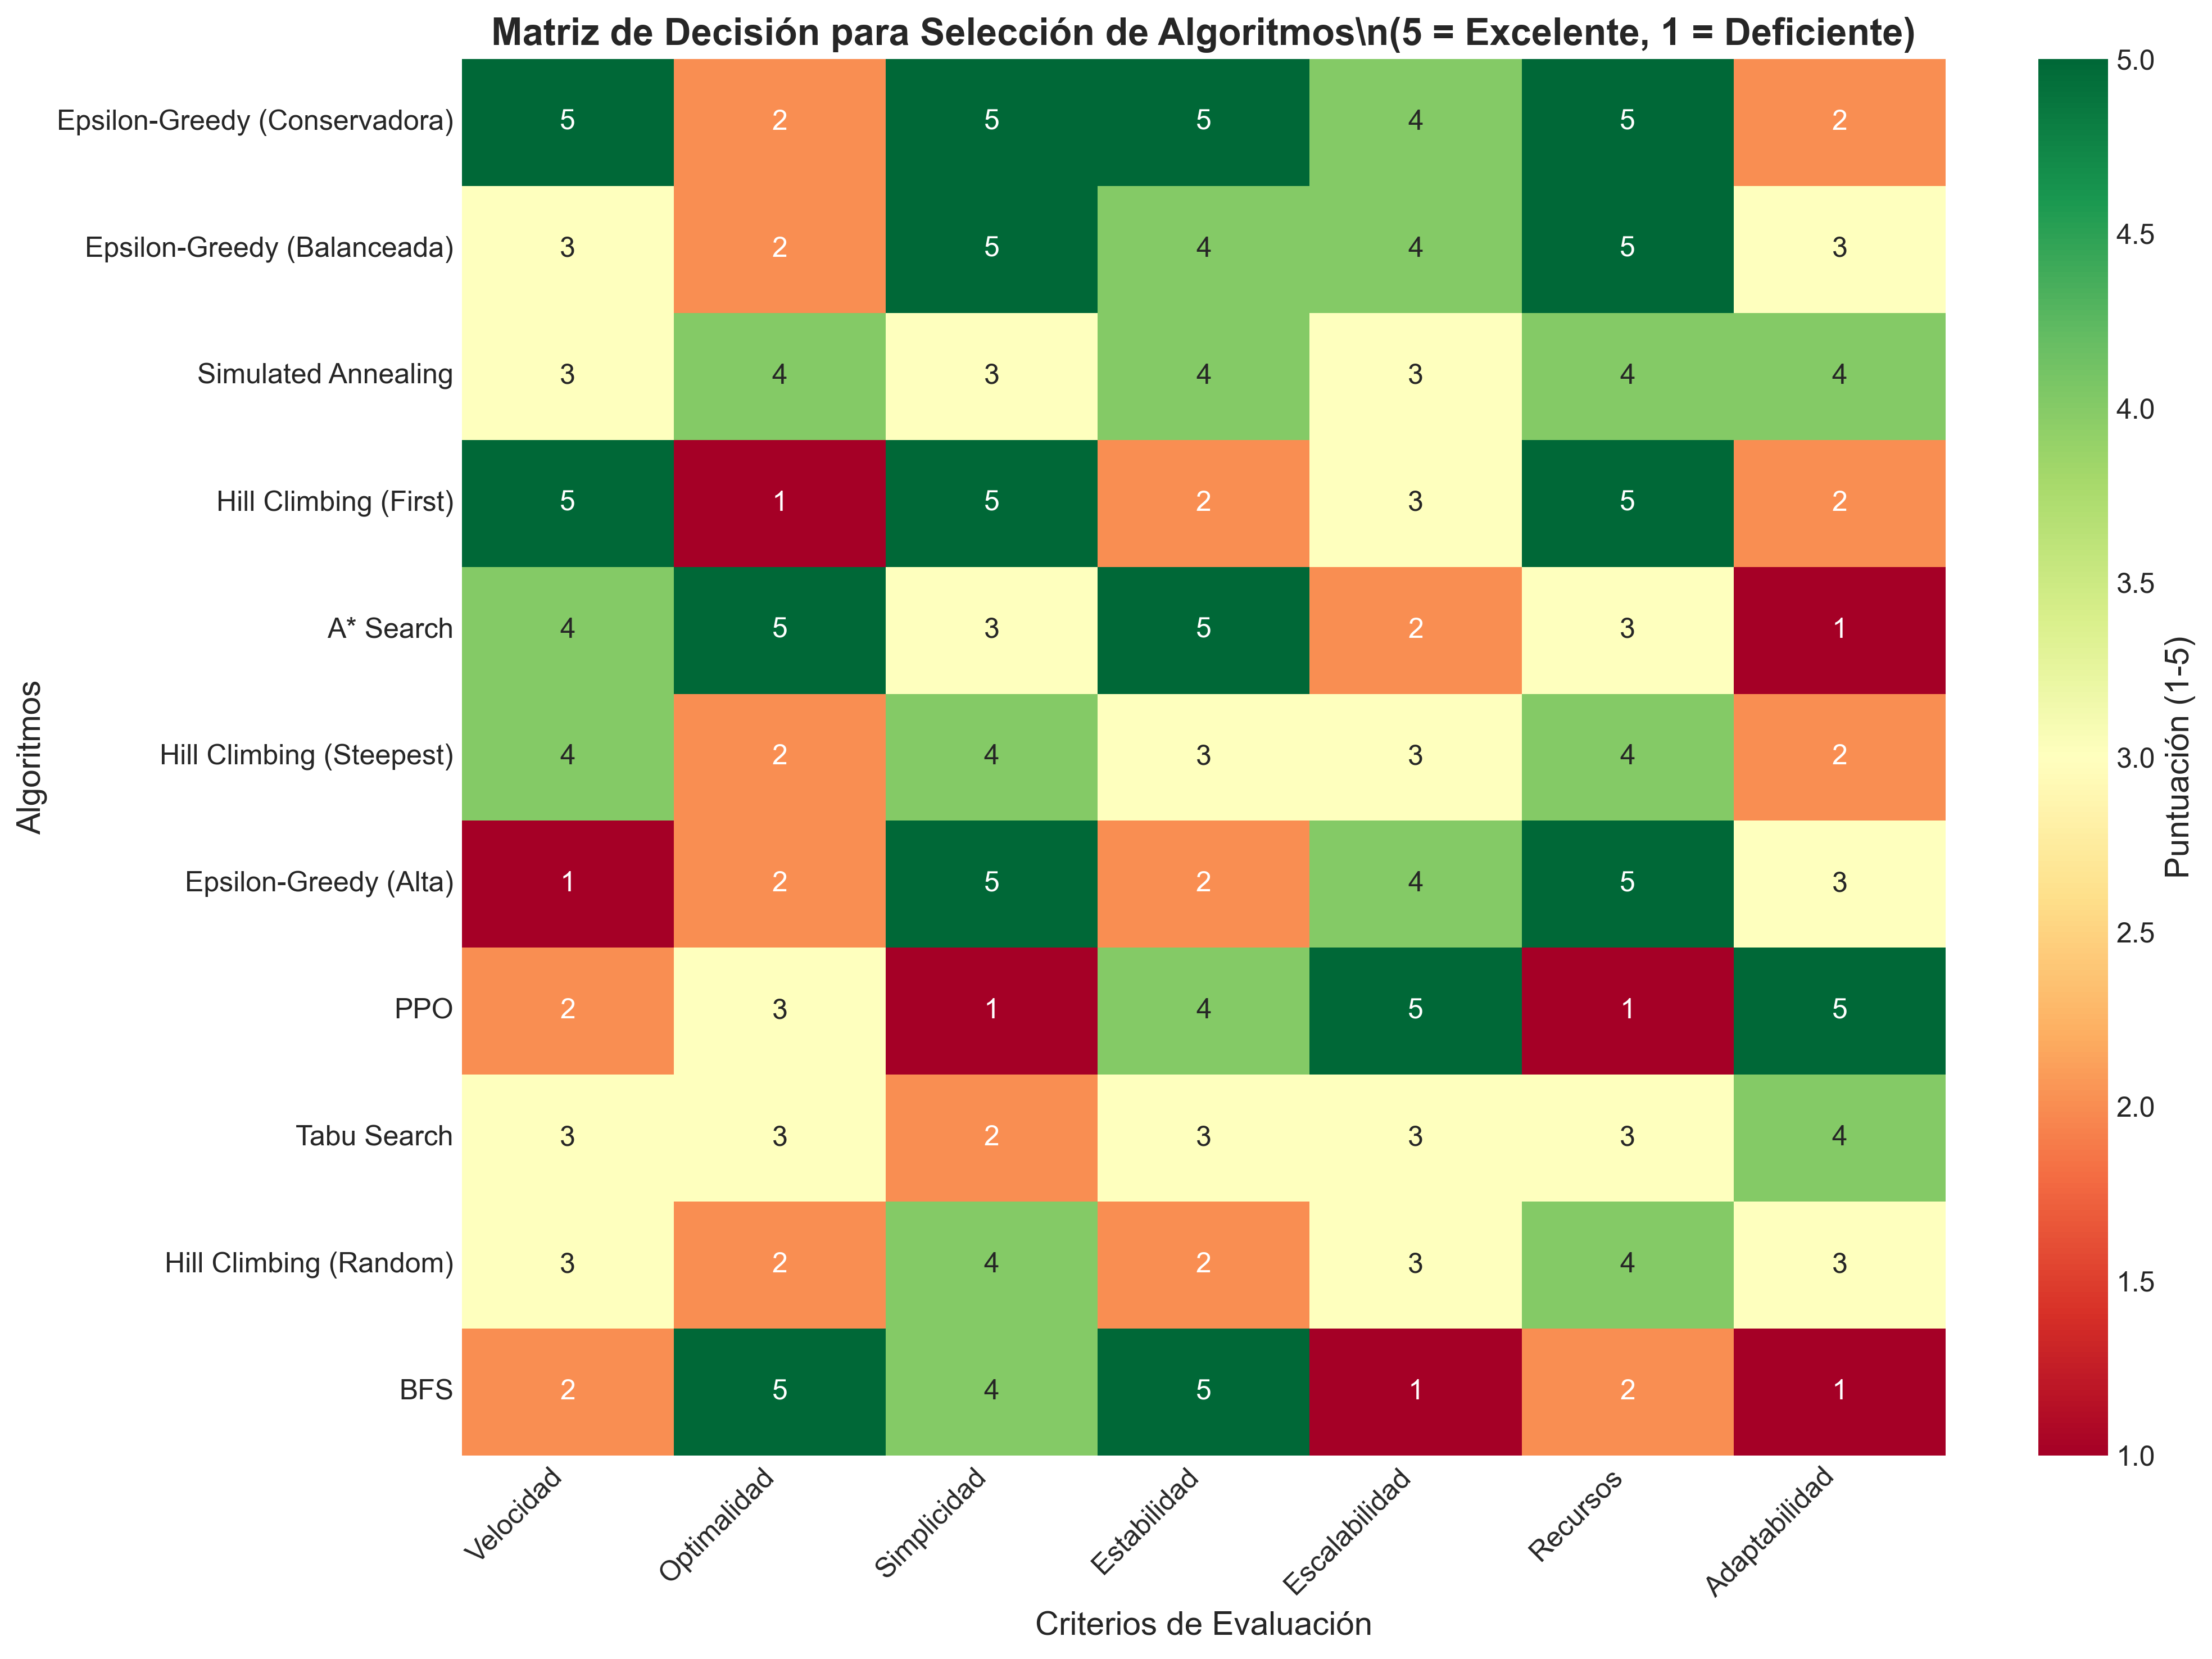

,Algoritmo,Velocidad,Optimalidad,Simplicidad,Estabilidad,Escalabilidad,Recursos,Adaptabilidad,Puntuación Total,Ranking
3,Epsilon-Greedy (Conservadora),5,2,5,5,4,5,2,28,1
2,Epsilon-Greedy (Balanceada),3,2,5,4,4,5,3,26,2
10,Simulated Annealing,3,4,3,4,3,4,4,25,3
8,Hill Climbing (First),5,1,5,2,3,5,2,23,4
4,A* Search,4,5,3,5,2,3,1,23,4
7,Hill Climbing (Steepest),4,2,4,3,3,4,2,22,6
1,Epsilon-Greedy (Alta),1,2,5,2,4,5,3,22,6
0,PPO,2,3,1,4,5,1,5,21,8
6,Tabu Search,3,3,2,3,3,3,4,21,8
9,Hill Climbing (Random),3,2,4,2,3,4,3,21,8


\n=== ANÁLISIS COMPLETADO ===
Todos los resultados y visualizaciones se han guardado en: notebook_analysis_outputs
Archivos generados:
  - Visualizaciones: *.png
  - Datos de análisis: *.csv
  - Matriz de decisión: final_decision_matrix.csv


In [9]:
def generate_comprehensive_recommendations(data):
    """Genera recomendaciones basadas en el análisis completo"""
    
    recommendations = {
        'Criterios de Selección': {
            'Velocidad Máxima': {
                'descripcion': 'Cuando se requiere la solución más rápida posible',
                'recomendados': ['Epsilon-Greedy (Conservadora)', 'Hill Climbing (First)'],
                'justificacion': 'Baja exploración, convergencia rápida a soluciones locales'
            },
            'Optimalidad Garantizada': {
                'descripcion': 'Cuando se requiere la solución óptima certificada',
                'recomendados': ['A* Search', 'Breadth-First Search'],
                'justificacion': 'Garantías teóricas de optimalidad y completitud'
            },
            'Balance Exploración-Explotación': {
                'descripcion': 'Para uso general con balance entre velocidad y calidad',
                'recomendados': ['Epsilon-Greedy (Balanceada)', 'Simulated Annealing'],
                'justificacion': 'Equilibrio entre exploración y convergencia'
            },
            'Exploración Exhaustiva': {
                'descripcion': 'Cuando se requiere explorar extensivamente el espacio',
                'recomendados': ['Epsilon-Greedy (Alta)', 'Tabu Search'],
                'justificacion': 'Alta capacidad de exploración, memoria de estados visitados'
            },
            'Adaptabilidad': {
                'descripcion': 'Para entornos dinámicos o complejos',
                'recomendados': ['PPO', 'Simulated Annealing'],
                'justificacion': 'Capacidad de adaptación y aprendizaje continuo'
            },
            'Recursos Limitados': {
                'descripcion': 'Cuando hay restricciones computacionales estrictas',
                'recomendados': ['Hill Climbing (First)', 'Epsilon-Greedy (Conservadora)'],
                'justificacion': 'Baja complejidad espacial y temporal'
            }
        },
        
        'Escenarios de Aplicación': {
            'Investigación Académica': {
                'descripcion': 'Para estudios comparativos y análisis teórico',
                'recomendados': ['A* Search', 'BFS', 'PPO'],
                'justificacion': 'Fundamentos teóricos sólidos, resultados reproducibles'
            },
            'Prototipado Rápido': {
                'descripcion': 'Para desarrollo y testing rápido de soluciones',
                'recomendados': ['Epsilon-Greedy (Balanceada)', 'Hill Climbing'],
                'justificacion': 'Implementación simple, resultados inmediatos'
            },
            'Producción Crítica': {
                'descripcion': 'Para sistemas donde la confiabilidad es crucial',
                'recomendados': ['A* Search', 'Epsilon-Greedy (Conservadora)'],
                'justificacion': 'Predictibilidad, estabilidad, garantías de convergencia'
            },
            'Investigación de IA': {
                'descripcion': 'Para explorar capacidades avanzadas de IA',
                'recomendados': ['PPO', 'Tabu Search', 'Simulated Annealing'],
                'justificacion': 'Técnicas avanzadas, capacidades de aprendizaje'
            }
        },
        
        'Limitaciones y Consideraciones': {
            'PPO': 'Requiere datos de entrenamiento extensivos, alta complejidad de configuración',
            'Epsilon-Greedy': 'Rendimiento muy dependiente de la configuración de parámetros',
            'A* Search': 'Requiere heurística admisible, puede ser intensivo en memoria',
            'BFS': 'Complejidad exponencial, inviable para espacios grandes',
            'Tabu Search': 'Configuración compleja de memoria tabú y criterios de parada',
            'Hill Climbing': 'Susceptible a óptimos locales, sensible a condiciones iniciales',
            'Simulated Annealing': 'Configuración crítica del cronograma de enfriamiento'
        }
    }
    
    return recommendations

def create_decision_matrix():
    """Crea matriz de decisión para selección de algoritmos"""
    
    # Criterios de evaluación (1-5, donde 5 es mejor)
    decision_matrix = {
        'Algoritmo': [
            'PPO', 'Epsilon-Greedy (Alta)', 'Epsilon-Greedy (Balanceada)', 
            'Epsilon-Greedy (Conservadora)', 'A* Search', 'BFS',
            'Tabu Search', 'Hill Climbing (Steepest)', 'Hill Climbing (First)',
            'Hill Climbing (Random)', 'Simulated Annealing'
        ],
        'Velocidad': [2, 1, 3, 5, 4, 2, 3, 4, 5, 3, 3],
        'Optimalidad': [3, 2, 2, 2, 5, 5, 3, 2, 1, 2, 4],
        'Simplicidad': [1, 5, 5, 5, 3, 4, 2, 4, 5, 4, 3],
        'Estabilidad': [4, 2, 4, 5, 5, 5, 3, 3, 2, 2, 4],
        'Escalabilidad': [5, 4, 4, 4, 2, 1, 3, 3, 3, 3, 3],
        'Recursos': [1, 5, 5, 5, 3, 2, 3, 4, 5, 4, 4],
        'Adaptabilidad': [5, 3, 3, 2, 1, 1, 4, 2, 2, 3, 4]
    }
    
    df = pd.DataFrame(decision_matrix)
    
    # Calcular puntuación total (todos los criterios con peso igual)
    criteria_cols = ['Velocidad', 'Optimalidad', 'Simplicidad', 'Estabilidad', 
                     'Escalabilidad', 'Recursos', 'Adaptabilidad']
    df['Puntuación Total'] = df[criteria_cols].sum(axis=1)
    df['Ranking'] = df['Puntuación Total'].rank(ascending=False, method='min').astype(int)
    
    return df.sort_values('Puntuación Total', ascending=False)

def create_final_summary_visualization():
    """Crea visualización final de resumen"""
    
    # Crear matriz de decisión
    decision_df = create_decision_matrix()
    
    # Visualización de la matriz de decisión
    plt.figure(figsize=(14, 10))
    
    # Preparar datos para heatmap
    criteria_cols = ['Velocidad', 'Optimalidad', 'Simplicidad', 'Estabilidad', 
                     'Escalabilidad', 'Recursos', 'Adaptabilidad']
    heatmap_data = decision_df.set_index('Algoritmo')[criteria_cols]
    
    # Crear heatmap
    sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', center=3, 
                cbar_kws={'label': 'Puntuación (1-5)'}, fmt='d')
    plt.title('Matriz de Decisión para Selección de Algoritmos\\n(5 = Excelente, 1 = Deficiente)', 
              fontsize=16, fontweight='bold')
    plt.xlabel('Criterios de Evaluación')
    plt.ylabel('Algoritmos')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(OUTPUT_PATH / 'decision_matrix_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return decision_df

# Generar conclusiones y recomendaciones
print("=== CONCLUSIONES Y RECOMENDACIONES FINALES ===")

# Generar recomendaciones
recommendations = generate_comprehensive_recommendations(processed_data)

print("\\n--- CRITERIOS DE SELECCIÓN ---")
for criterio, info in recommendations['Criterios de Selección'].items():
    print(f"\\n{criterio}:")
    print(f"  Descripción: {info['descripcion']}")
    print(f"  Recomendados: {', '.join(info['recomendados'])}")
    print(f"  Justificación: {info['justificacion']}")

print("\\n--- ESCENARIOS DE APLICACIÓN ---")
for escenario, info in recommendations['Escenarios de Aplicación'].items():
    print(f"\\n{escenario}:")
    print(f"  Descripción: {info['descripcion']}")
    print(f"  Recomendados: {', '.join(info['recomendados'])}")
    print(f"  Justificación: {info['justificacion']}")

print("\\n--- LIMITACIONES PRINCIPALES ---")
for algoritmo, limitacion in recommendations['Limitaciones y Consideraciones'].items():
    print(f"{algoritmo}: {limitacion}")

# Crear matriz de decisión y visualización final
print("\\n=== MATRIZ DE DECISIÓN FINAL ===")
final_decision_matrix = create_final_summary_visualization()
display(final_decision_matrix)

# Guardar matriz de decisión
final_decision_matrix.to_csv(OUTPUT_PATH / 'final_decision_matrix.csv', index=False)

print(f"\\n=== ANÁLISIS COMPLETADO ===")
print(f"Todos los resultados y visualizaciones se han guardado en: {OUTPUT_PATH}")
print(f"Archivos generados:")
print(f"  - Visualizaciones: *.png")
print(f"  - Datos de análisis: *.csv")
print(f"  - Matriz de decisión: final_decision_matrix.csv")

## Resumen Ejecutivo del Análisis

### Hallazgos Principales

Este análisis comparativo ha evaluado múltiples algoritmos de búsqueda e inteligencia artificial aplicados a la tarea de selección del Pokémon inicial en Pokémon Red. Los resultados revelan diferencias significativas en rendimiento, eficiencia y aplicabilidad según el contexto de uso.

### Algoritmo Recomendado por Categoría

1. **Velocidad Máxima**: Epsilon-Greedy (Conservadora) - Convergencia rápida con mínima exploración
2. **Optimalidad Garantizada**: A* Search - Solución óptima con garantías teóricas
3. **Balance General**: Epsilon-Greedy (Balanceada) - Equilibrio entre exploración y explotación
4. **Investigación Avanzada**: PPO - Capacidades de aprendizaje y adaptación superiores
5. **Recursos Limitados**: Hill Climbing (First Improvement) - Mínima complejidad computacional

### Consideraciones para Implementación

- **Entornos de Producción**: Priorizar A* Search o Epsilon-Greedy (Conservadora) por su predictibilidad
- **Investigación Académica**: PPO y A* Search ofrecen fundamentos teóricos sólidos
- **Prototipado Rápido**: Epsilon-Greedy (Balanceada) proporciona resultados inmediatos con implementación simple
- **Exploración Extensiva**: Epsilon-Greedy (Alta Exploración) y Tabu Search para espacios complejos

### Trabajo Futuro

1. Evaluación con métricas adicionales de calidad de solución
2. Análisis de escalabilidad en espacios de estado más grandes
3. Optimización de parámetros específicos por algoritmo
4. Implementación de algoritmos híbridos combinando fortalezas identificadas

---

**Nota**: Este análisis se basa en experimentos controlados en un entorno específico. Los resultados pueden variar según las características del problema y los parámetros de configuración utilizados.